<a href="https://colab.research.google.com/github/AlexHudnev/data_analysis/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/drive/My Drive/openpowerlifting.csv', index_col=0)

data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,92.5,105.0,NaN,105.0,45.0,50.0,55.0,NaN,55.0,110.0,120.0,130.0,NaN,130.0,290.0,4,324.16,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,110.0,120.0,NaN,120.0,55.0,62.5,67.5,NaN,67.5,130.0,140.0,145.0,NaN,145.0,332.5,2,378.07,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,NaN,NaN,NaN,NaN,27.5,32.5,-35.0,NaN,32.5,NaN,NaN,NaN,NaN,NaN,32.5,1,38.56,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,-105.0,105.0,NaN,105.0,67.5,72.5,-75.0,NaN,72.5,132.5,-140.0,-140.0,NaN,132.5,310.0,3,345.61,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,130.0,140.0,NaN,140.0,70.0,75.0,80.0,NaN,80.0,150.0,160.0,170.0,NaN,170.0,390.0,3,321.25,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


Text(0.5, 1.0, 'Total kg by age')

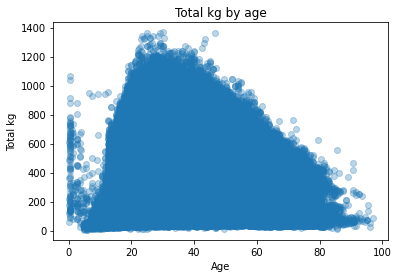

In [18]:
total_kg = data['TotalKg'].values
age = data['Age'].values

plt.scatter(age, total_kg, alpha=0.3)

plt.xlabel('Age')
plt.ylabel('Total kg')
plt.title('Total kg by age')

Молодые люди оказываются сильнее

Text(0.5, 1.0, 'Body weight by age')

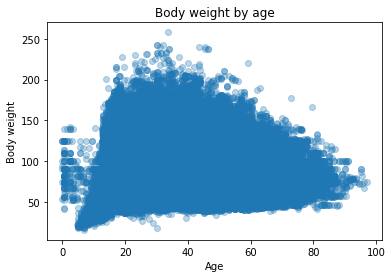

In [19]:
body_weight_kg = data['BodyweightKg'].values
age = data['Age'].values

plt.scatter(age, body_weight_kg, alpha=0.3)

plt.xlabel('Age')
plt.ylabel('Body weight')
plt.title('Body weight by age')

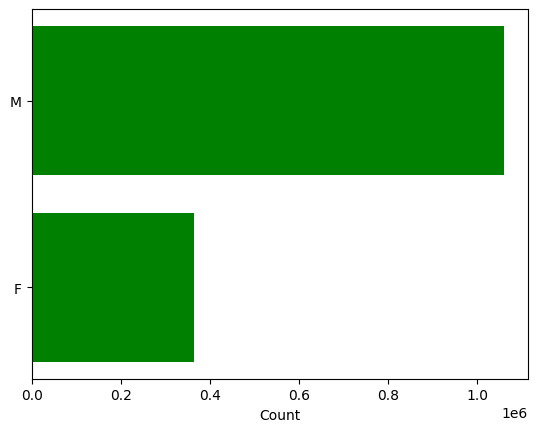

In [24]:


gender = np.unique(data['Sex'].values, return_counts=True)  
gender_count = len(gender[0]) 

plt.rcdefaults()
fig, ax = plt.subplots()

df = pd.DataFrame({
    'Genders': gender[0],
    'counts': gender[1]
}).sort_values(by=['counts'])

genders = df['Genders'][::-1]
counts = df.counts[::-1]

positions = np.arange(gender_count)

ax.barh(positions, counts, align='center', color='green', ecolor='black')
ax.set_yticks(positions)
ax.set_yticklabels(genders)
ax.invert_yaxis()  
ax.set_xlabel('Count')

plt.show()



Мужчин повер-лифтеров больше чем женщин